In [120]:
import pandas as pd
from datetime import datetime
import datetime as dt
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
from matplotlib import style

In [121]:
style.use('ggplot')
def next_biz_day(d):
    nd = d+dt.timedelta(days=1)
    return nd if nd.weekday() in range(5) else next_biz_day(nd)

def prev_biz_day(d):
    pd = d-dt.timedelta(days=1)
    return pd if pd.weekday() in range(5) else prev_biz_day(pd)

In [122]:
st = prev_biz_day(next_biz_day(datetime(2010,4,5)))
ed = prev_biz_day(next_biz_day(datetime(2017,4,10)))
stock_list = 'BIDU,MSFT,GOOG,AAPL,AMZN,INTC'
target = 'BIDU'
nop = 20
print (st, ed)

2010-04-05 00:00:00 2017-04-10 00:00:00


In [123]:
stocks = stock_list.split(',')
dfs = [data.DataReader(s, 'yahoo', st, ed) for s in stocks] + [
       data.DataReader(s, 'yahoo', st, ed).diff() for s in stocks]
mdfs = []
for i, d in enumerate(dfs):
    d.columns = [c+str(i) for c in d.columns]
    mdfs.append(d)
ds = pd.concat(mdfs, axis=1)

In [124]:
tst = next_biz_day(st)
ted = next_biz_day(ed)
print(tst, ted)
tdf = data.DataReader(target, 'yahoo', tst, ted).diff()

2010-04-06 00:00:00 2017-04-11 00:00:00


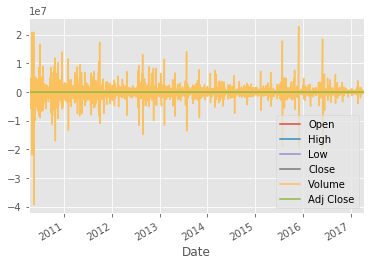

In [125]:
tdf.plot()
plt.show()

In [126]:
from sklearn import *
lnr = tree.DecisionTreeRegressor()

In [127]:
print (len(ds),len(tdf))

1768 1768


<b>drop the first 2 rows - NaN due to diff()</b>

In [132]:
lnr.fit(ds[2:-nop], tdf['Close'][2:-nop])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [133]:
predicted = lnr.predict(ds[-nop:])
out = pd.Series(predicted, tdf[-nop:].index, name='Predicted')
results = (pd.concat([tdf['Close'][-nop:], out], axis=1))

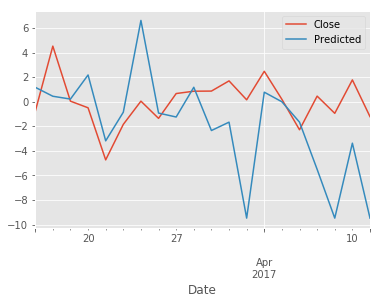

In [134]:
results.plot()
plt.show()

<b>Print out the daily diff</b>

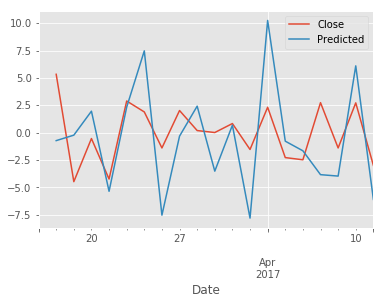

In [135]:
results.diff().plot()
plt.show()